# SAHIL RAJ
#TOMATOES DISEASE CLASSIFICATION

In [49]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [50]:

train_path = "C:/Users/Sahil/Downloads/Tomatoes/train"
valid_path = "C:/Users/Sahil/Downloads/Tomatoes/val"

In [51]:

image_size = (224, 224)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

In [52]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)

In [53]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 1990 images belonging to 10 classes.


In [54]:
valid_generator = valid_datagen.flow_from_directory(
    directory=valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 500 images belonging to 10 classes.


In [55]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

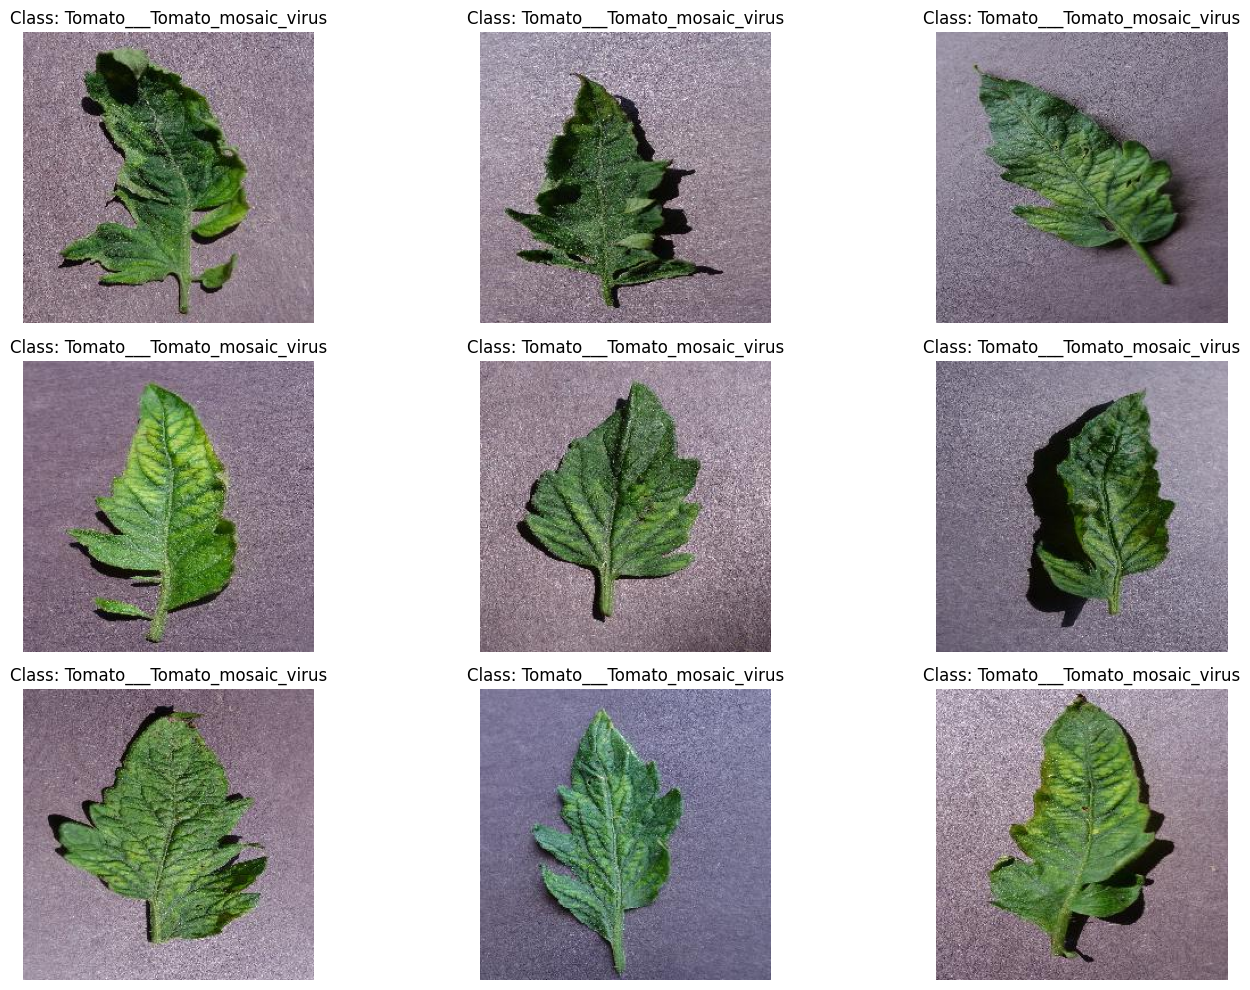

In [59]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_images(directory, num_images=9, num_columns=3):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(directory, random_subfolder)
    image_files = [filename for filename in os.listdir(subfolder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if len(image_files) < num_images:
        print(f"Number of available images in {subfolder_path} is less than {num_images}")
        return
    
    random_files = random.sample(image_files, num_images)
    num_rows = (num_images + num_columns - 1) // num_columns
    plt.figure(figsize=(15, 10))
    
    for i, filename in enumerate(random_files):
        img_path = os.path.join(subfolder_path, filename)
        img = mpimg.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(img)
        plt.axis('off')
        
        # Getting the class of the image based on the subfolder name.
        image_class = random_subfolder

        # Adding the class to the title of the subplot.
        plt.title(f"Class: {image_class}")
    
    plt.tight_layout()
    plt.show()


directory_path = "C:\\Users\\Sahil\\Downloads\\Tomatoes\\train"
display_random_images(directory_path, num_images=9, num_columns=3)


In [60]:
import os

def display_class_labels(directory):
    subfolders = [subfolder for subfolder in os.listdir(directory) if os.path.isdir(os.path.join(directory, subfolder))]
    
    if len(subfolders) == 0:
        print(f"No subfolders found in {directory}")
        return
    
    print("Class Labels:")
    for subfolder in subfolders:
        print(subfolder)

directory_path = "C:\\Users\\Sahil\\Downloads\\Tomatoes\\train"
display_class_labels(directory_path)


Class Labels:
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


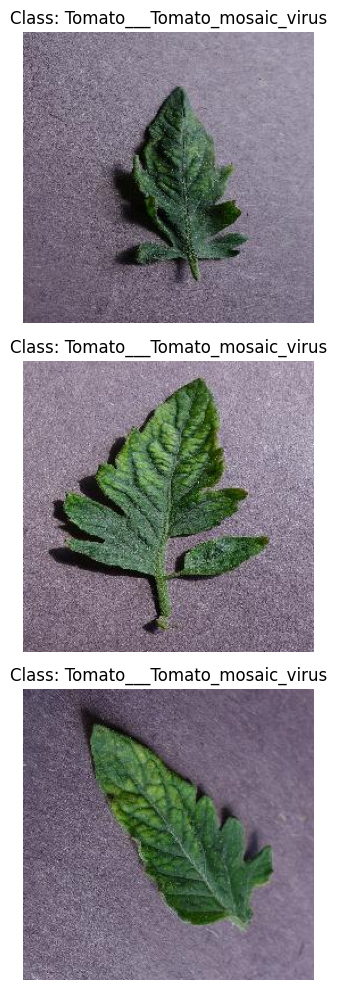

In [58]:

display_random_images(train_path, num_images=3, num_columns=1)

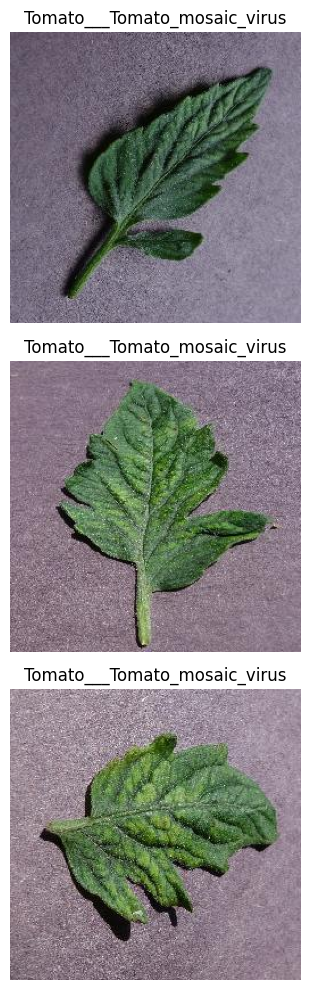

In [10]:

display_random_images(valid_path, num_images=3, num_columns=1)

In [26]:
image_size = train_generator.image_shape  # This will return a tuple (height, width, channels)
print("Image Size (Height, Width, Channels):", image_size)

Image Size (Height, Width, Channels): (224, 224, 3)


In [27]:
#MobilenetV2 Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model2 = MobileNetV2(weights='imagenet', include_top=False,input_shape=(224,224,3))


x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes


model2 = Model(inputs=base_model2.input, outputs=predictions)

# Freezing  the layers of the base model
for layer in base_model2.layers:
    layer.trainable = False


model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [28]:

epochs = 6
batch_size = 64


history7 = model2.fit(
  train_generator,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=valid_generator
)

Epoch 1/6
63/63 [==============================] - 55s 842ms/step - loss: 1.3773 - accuracy: 0.5382 - val_loss: 0.8890 - val_accuracy: 0.7060
Epoch 2/6
63/63 [==============================] - 53s 845ms/step - loss: 0.6422 - accuracy: 0.8030 - val_loss: 0.7287 - val_accuracy: 0.7540
Epoch 3/6
63/63 [==============================] - 56s 886ms/step - loss: 0.4743 - accuracy: 0.8613 - val_loss: 0.6325 - val_accuracy: 0.7840
Epoch 4/6
63/63 [==============================] - 57s 908ms/step - loss: 0.3550 - accuracy: 0.8990 - val_loss: 0.5496 - val_accuracy: 0.8140
Epoch 5/6
63/63 [==============================] - 57s 914ms/step - loss: 0.2807 - accuracy: 0.9276 - val_loss: 0.5780 - val_accuracy: 0.8020
Epoch 6/6
63/63 [==============================] - 61s 974ms/step - loss: 0.2319 - accuracy: 0.9437 - val_loss: 0.5272 - val_accuracy: 0.8200


Epoch 1 - Train Loss: 1.3773161172866821, Validation Loss: 0.8890073299407959
Epoch 1 - Train Accuracy: 0.5381909608840942, Validation Accuracy: 0.7059999704360962
Epoch 2 - Train Loss: 0.6422293186187744, Validation Loss: 0.7287026643753052
Epoch 2 - Train Accuracy: 0.8030150532722473, Validation Accuracy: 0.7540000081062317
Epoch 3 - Train Loss: 0.47427886724472046, Validation Loss: 0.6324881315231323
Epoch 3 - Train Accuracy: 0.8613065481185913, Validation Accuracy: 0.7839999794960022
Epoch 4 - Train Loss: 0.3549535274505615, Validation Loss: 0.5495955944061279
Epoch 4 - Train Accuracy: 0.8989949822425842, Validation Accuracy: 0.8140000104904175
Epoch 5 - Train Loss: 0.28065431118011475, Validation Loss: 0.577993631362915
Epoch 5 - Train Accuracy: 0.9276381731033325, Validation Accuracy: 0.8019999861717224
Epoch 6 - Train Loss: 0.23191897571086884, Validation Loss: 0.52716463804245
Epoch 6 - Train Accuracy: 0.9437186121940613, Validation Accuracy: 0.8199999928474426


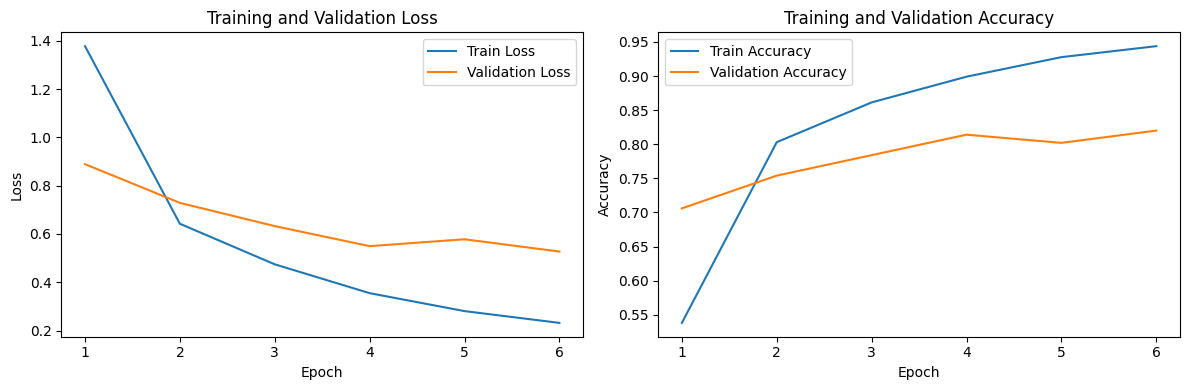

In [41]:
import matplotlib.pyplot as plt


train_loss = history7.history['loss']
val_loss = history7.history['val_loss']
train_acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

for epoch in range(epochs):
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss[epoch]}, Validation Loss: {val_loss[epoch]}')
    print(f'Epoch {epoch + 1} - Train Accuracy: {train_acc[epoch]}, Validation Accuracy: {val_acc[epoch]}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [31]:
#VGG16 Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model_vgg16.output
x = Flatten()(x) 
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes


model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

for layer in base_model_vgg16.layers:
    layer.trainable = False


model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [32]:

epochs = 6
batch_size = 64


history9 = model_vgg16.fit(
  train_generator,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=valid_generator
)

Epoch 1/6
63/63 [==============================] - 229s 4s/step - loss: 1.7212 - accuracy: 0.4633 - val_loss: 1.1825 - val_accuracy: 0.6420
Epoch 2/6
63/63 [==============================] - 240s 4s/step - loss: 0.8031 - accuracy: 0.7698 - val_loss: 0.8604 - val_accuracy: 0.7160
Epoch 3/6
63/63 [==============================] - 239s 4s/step - loss: 0.4776 - accuracy: 0.8754 - val_loss: 0.7523 - val_accuracy: 0.7480
Epoch 4/6
63/63 [==============================] - 247s 4s/step - loss: 0.3110 - accuracy: 0.9357 - val_loss: 0.6385 - val_accuracy: 0.7960
Epoch 5/6
63/63 [==============================] - 249s 4s/step - loss: 0.2290 - accuracy: 0.9588 - val_loss: 0.6253 - val_accuracy: 0.7860
Epoch 6/6
63/63 [==============================] - 251s 4s/step - loss: 0.1574 - accuracy: 0.9789 - val_loss: 0.6070 - val_accuracy: 0.8040


Epoch 1 - Train Loss: 2.114881753921509, Validation Loss: 1.6451234817504883
Epoch 1 - Train Accuracy: 0.18994975090026855, Validation Accuracy: 0.38199999928474426
Epoch 2 - Train Loss: 1.4509841203689575, Validation Loss: 1.0656585693359375
Epoch 2 - Train Accuracy: 0.4733668267726898, Validation Accuracy: 0.656000018119812
Epoch 3 - Train Loss: 1.0136672258377075, Validation Loss: 1.0076807737350464
Epoch 3 - Train Accuracy: 0.656783938407898, Validation Accuracy: 0.6539999842643738
Epoch 4 - Train Loss: 0.8974815011024475, Validation Loss: 0.9237574338912964
Epoch 4 - Train Accuracy: 0.6859296560287476, Validation Accuracy: 0.6980000138282776
Epoch 5 - Train Loss: 0.7179579734802246, Validation Loss: 0.8592031002044678
Epoch 5 - Train Accuracy: 0.7467336654663086, Validation Accuracy: 0.7239999771118164
Epoch 6 - Train Loss: 0.6185047626495361, Validation Loss: 0.8067818880081177
Epoch 6 - Train Accuracy: 0.7859296202659607, Validation Accuracy: 0.7459999918937683


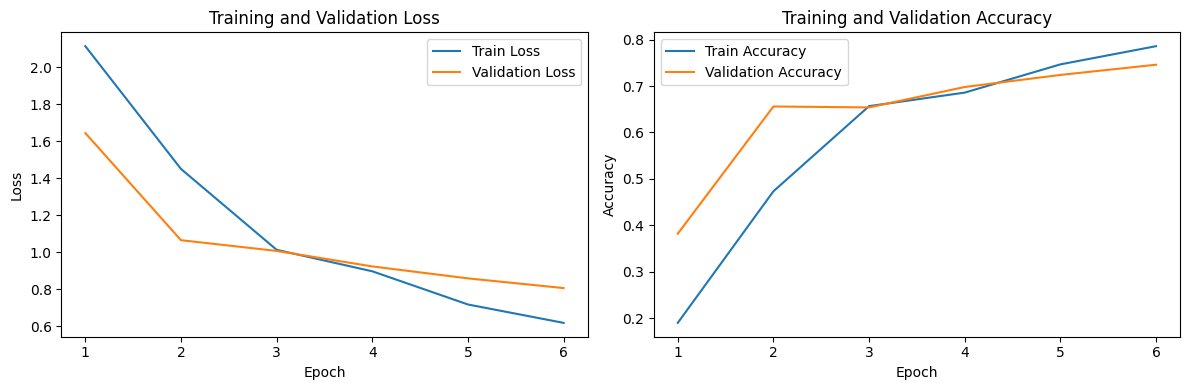

In [42]:


train_loss = history9.history['loss']
val_loss = history9.history['val_loss']
train_acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']
for epoch in range(epochs):
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss[epoch]}, Validation Loss: {val_loss[epoch]}')
    print(f'Epoch {epoch + 1} - Train Accuracy: {train_acc[epoch]}, Validation Accuracy: {val_acc[epoch]}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
#Sequential CNN Model
model3 = keras.Sequential()


model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))


model3.add(layers.Flatten())

model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))  # 10 classes for tomato leaf diseases


model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [43]:
history12 = model3.fit(
  train_generator,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=valid_generator
)

Epoch 1/6
63/63 [==============================] - 95s 1s/step - loss: 0.5218 - accuracy: 0.8211 - val_loss: 0.8166 - val_accuracy: 0.7440
Epoch 2/6
63/63 [==============================] - 95s 2s/step - loss: 0.4552 - accuracy: 0.8432 - val_loss: 1.0134 - val_accuracy: 0.6740
Epoch 3/6
63/63 [==============================] - 94s 1s/step - loss: 0.4136 - accuracy: 0.8513 - val_loss: 0.7440 - val_accuracy: 0.7700
Epoch 4/6
63/63 [==============================] - 95s 2s/step - loss: 0.3109 - accuracy: 0.8935 - val_loss: 0.7614 - val_accuracy: 0.7860
Epoch 5/6
63/63 [==============================] - 95s 2s/step - loss: 0.2185 - accuracy: 0.9196 - val_loss: 0.9674 - val_accuracy: 0.7620
Epoch 6/6
63/63 [==============================] - 95s 2s/step - loss: 0.2128 - accuracy: 0.9251 - val_loss: 1.0992 - val_accuracy: 0.7280


Epoch 1 - Train Loss: 0.5217870473861694, Validation Loss: 0.8166006207466125
Epoch 1 - Train Accuracy: 0.8211055397987366, Validation Accuracy: 0.7440000176429749
Epoch 2 - Train Loss: 0.4552192687988281, Validation Loss: 1.0133748054504395
Epoch 2 - Train Accuracy: 0.843216061592102, Validation Accuracy: 0.6740000247955322
Epoch 3 - Train Loss: 0.41361546516418457, Validation Loss: 0.7440382242202759
Epoch 3 - Train Accuracy: 0.8512563109397888, Validation Accuracy: 0.7699999809265137
Epoch 4 - Train Loss: 0.31089457869529724, Validation Loss: 0.7614187598228455
Epoch 4 - Train Accuracy: 0.8934673070907593, Validation Accuracy: 0.7860000133514404
Epoch 5 - Train Loss: 0.2184789627790451, Validation Loss: 0.9674462080001831
Epoch 5 - Train Accuracy: 0.9195979833602905, Validation Accuracy: 0.7620000243186951
Epoch 6 - Train Loss: 0.21277375519275665, Validation Loss: 1.0992401838302612
Epoch 6 - Train Accuracy: 0.9251255989074707, Validation Accuracy: 0.7279999852180481


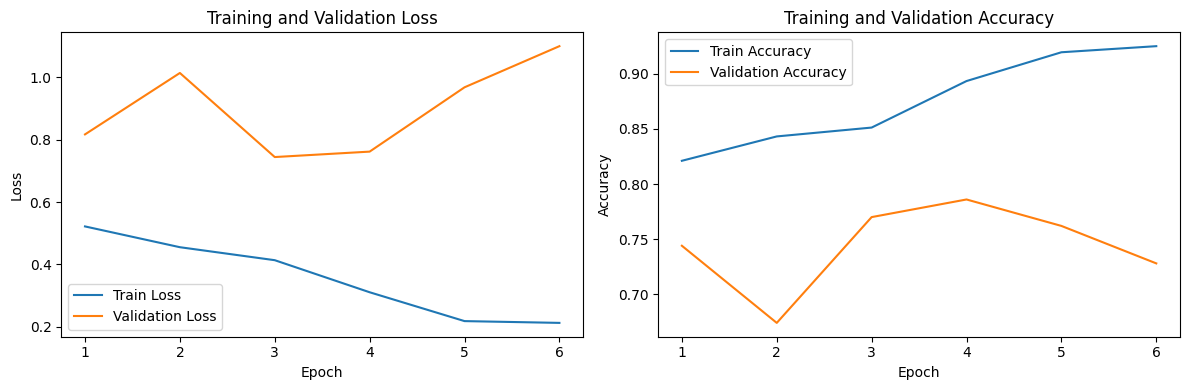

In [44]:



train_loss = history12.history['loss']
val_loss = history12.history['val_loss']
train_acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

for epoch in range(epochs):
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss[epoch]}, Validation Loss: {val_loss[epoch]}')
    print(f'Epoch {epoch + 1} - Train Accuracy: {train_acc[epoch]}, Validation Accuracy: {val_acc[epoch]}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
#CNN+LSTM model
model1 = keras.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

# LSTM layer
model1.add(layers.Reshape((-1, 256)))  # Adjust the shape based on the output of the last convolutional layer
model1.add(layers.LSTM(128, return_sequences=True))
model1.add(layers.LSTM(128, return_sequences=True))


model1.add(layers.Flatten())
model1.add(layers.Dropout(0.25))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))  # 10 classes for tomato leaf diseases


model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_103 (Conv2D)         (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_104 (Conv2D)         (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [38]:
history10 = model1.fit(
  train_generator,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=valid_generator
)

Epoch 1/6
63/63 [==============================] - 110s 2s/step - loss: 2.2105 - accuracy: 0.1467 - val_loss: 1.9369 - val_accuracy: 0.2160
Epoch 2/6
63/63 [==============================] - 106s 2s/step - loss: 1.9464 - accuracy: 0.2749 - val_loss: 1.9012 - val_accuracy: 0.2940
Epoch 3/6
63/63 [==============================] - 105s 2s/step - loss: 1.7430 - accuracy: 0.3683 - val_loss: 1.5935 - val_accuracy: 0.3720
Epoch 4/6
63/63 [==============================] - 105s 2s/step - loss: 1.5461 - accuracy: 0.4111 - val_loss: 1.2711 - val_accuracy: 0.5500
Epoch 5/6
63/63 [==============================] - 104s 2s/step - loss: 1.2270 - accuracy: 0.5643 - val_loss: 1.1969 - val_accuracy: 0.5580
Epoch 6/6
63/63 [==============================] - 108s 2s/step - loss: 1.0986 - accuracy: 0.6201 - val_loss: 0.9565 - val_accuracy: 0.6700


Epoch 1 - Train Loss: 2.21051025390625, Validation Loss: 1.9368712902069092
Epoch 1 - Train Accuracy: 0.14673367142677307, Validation Accuracy: 0.2160000056028366
Epoch 2 - Train Loss: 1.9463807344436646, Validation Loss: 1.9012202024459839
Epoch 2 - Train Accuracy: 0.27487435936927795, Validation Accuracy: 0.2939999997615814
Epoch 3 - Train Loss: 1.7429734468460083, Validation Loss: 1.5935211181640625
Epoch 3 - Train Accuracy: 0.36834171414375305, Validation Accuracy: 0.3720000088214874
Epoch 4 - Train Loss: 1.5460954904556274, Validation Loss: 1.2710516452789307
Epoch 4 - Train Accuracy: 0.4110552668571472, Validation Accuracy: 0.550000011920929
Epoch 5 - Train Loss: 1.2270399332046509, Validation Loss: 1.1969079971313477
Epoch 5 - Train Accuracy: 0.5643216371536255, Validation Accuracy: 0.5580000281333923
Epoch 6 - Train Loss: 1.098565936088562, Validation Loss: 0.9565141201019287
Epoch 6 - Train Accuracy: 0.6201004981994629, Validation Accuracy: 0.6700000166893005


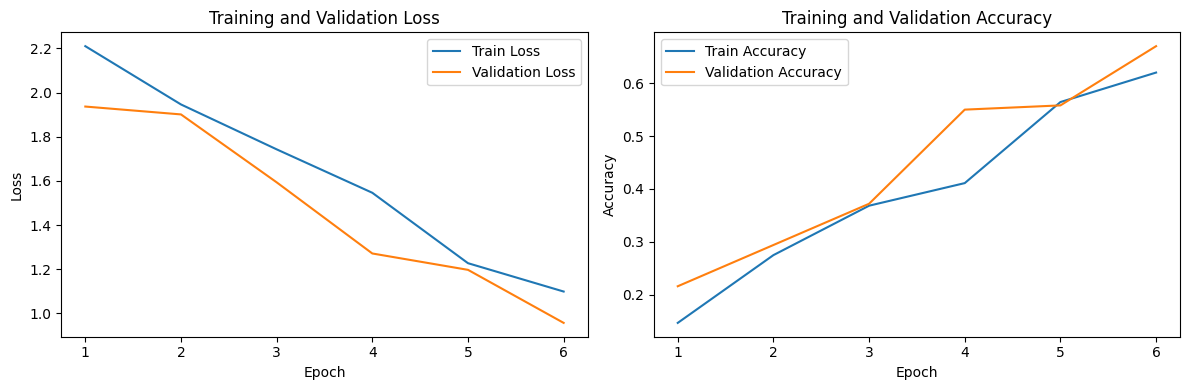

In [45]:



train_loss = history10.history['loss']
val_loss = history10.history['val_loss']
train_acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']


for epoch in range(epochs):
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss[epoch]}, Validation Loss: {val_loss[epoch]}')
    print(f'Epoch {epoch + 1} - Train Accuracy: {train_acc[epoch]}, Validation Accuracy: {val_acc[epoch]}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [39]:
#Inception Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# InceptionV3 base model
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model_inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 classes


model_inception = Model(inputs=base_model_inception.input, outputs=predictions)


for layer in base_model_inception.layers:
    layer.trainable = False


model_inception.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


model_inception.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_106 (Conv2D)         (None, 111, 111, 32)         864       ['input_9[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_106[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 conv2d_117 (Conv2D)         (None, 25, 25, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_normalization_99 (Ba  (None, 25, 25, 64)           192       ['conv2d_111[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_101 (B  (None, 25, 25, 64)           192       ['conv2d_113[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_104 (B  (None, 25, 25, 96)           288       ['conv2d_116[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_111[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_112 (Activation  (None, 25, 25, 64)           0         ['batch_normalization_112[0][0
 )                                                                  ]']                           
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_106[0][0]',      
                                                                     'activation_108[0][0]',      
          

 )                                                                  ]']                           
                                                                                                  
 conv2d_134 (Conv2D)         (None, 25, 25, 96)           55296     ['activation_121[0][0]']      
                                                                                                  
 batch_normalization_122 (B  (None, 25, 25, 96)           288       ['conv2d_134[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_122 (Activation  (None, 25, 25, 96)           0         ['batch_normalization_122[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_13

                                                                                                  
 conv2d_136 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_139 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_126[0][0]']      
                                                                                                  
 conv2d_144 (Conv2D)         (None, 12, 12, 192)          172032    ['activation_131[0][0]']      
                                                                                                  
 conv2d_145 (Conv2D)         (None, 12, 12, 192)          147456    ['average_pooling2d_12[0][0]']
                                                                                                  
 batch_normalization_124 (B  (None, 12, 12, 192)          576       ['conv2d_136[0][0]']          
 atchNorma

 activation_141 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_13 (Aver  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_146 (Conv2D)         (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_149 (Conv2D)         (None, 12, 12, 192)          215040    ['activation_136[0][0]']      
                                                                                                  
 conv2d_15

 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_146[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_151 (Activation  (None, 12, 12, 160)          0         ['batch_normalization_151[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_14 (Aver  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 agePooling2D)                                                                                    
          

                                                                                                  
 batch_normalization_156 (B  (None, 12, 12, 192)          576       ['conv2d_168[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_161 (B  (None, 12, 12, 192)          576       ['conv2d_173[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_156 (Activation  (None, 12, 12, 192)          0         ['batch_normalization_156[0][0
 )                                                                  ]']                           
                                                                                                  
 activatio

 )                                                                  ]']                           
                                                                                                  
 conv2d_177 (Conv2D)         (None, 5, 5, 320)            552960    ['activation_164[0][0]']      
                                                                                                  
 conv2d_181 (Conv2D)         (None, 5, 5, 192)            331776    ['activation_168[0][0]']      
                                                                                                  
 batch_normalization_165 (B  (None, 5, 5, 320)            960       ['conv2d_177[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_169 (B  (None, 5, 5, 192)            576       ['conv2d_181[0][0]']          
 atchNorma

 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_176[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_177 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_177[0][0
 )                                                                  ]']                           
                                                                                                  
 batch_normalization_178 (B  (None, 5, 5, 192)            576       ['conv2d_190[0][0]']          
 atchNormalization)                                                                               
          

 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_182[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_185 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_185[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_186 (Activation  (None, 5, 5, 384)            0         ['batch_normalization_186[0][0
 )                                                                  ]']                           
          

In [40]:
history11 = model_inception.fit(
  train_generator,
  epochs=epochs,
  batch_size=batch_size,
  validation_data=valid_generator
)

Epoch 1/6
63/63 [==============================] - 65s 987ms/step - loss: 1.6158 - accuracy: 0.4513 - val_loss: 1.1501 - val_accuracy: 0.6300
Epoch 2/6
63/63 [==============================] - 62s 981ms/step - loss: 0.9758 - accuracy: 0.6834 - val_loss: 1.0626 - val_accuracy: 0.6300
Epoch 3/6
63/63 [==============================] - 62s 990ms/step - loss: 0.7535 - accuracy: 0.7613 - val_loss: 0.9546 - val_accuracy: 0.6760
Epoch 4/6
63/63 [==============================] - 63s 997ms/step - loss: 0.5965 - accuracy: 0.8065 - val_loss: 0.8330 - val_accuracy: 0.7060
Epoch 5/6
63/63 [==============================] - 63s 994ms/step - loss: 0.4926 - accuracy: 0.8513 - val_loss: 0.8160 - val_accuracy: 0.7140
Epoch 6/6
63/63 [==============================] - 62s 993ms/step - loss: 0.4467 - accuracy: 0.8638 - val_loss: 0.8115 - val_accuracy: 0.7180


Epoch 1 - Train Loss: 1.615816593170166, Validation Loss: 1.150097370147705
Epoch 1 - Train Accuracy: 0.45125627517700195, Validation Accuracy: 0.6299999952316284
Epoch 2 - Train Loss: 0.9758293032646179, Validation Loss: 1.0626059770584106
Epoch 2 - Train Accuracy: 0.6834170818328857, Validation Accuracy: 0.6299999952316284
Epoch 3 - Train Loss: 0.7534505128860474, Validation Loss: 0.9546248316764832
Epoch 3 - Train Accuracy: 0.7613065242767334, Validation Accuracy: 0.6759999990463257
Epoch 4 - Train Loss: 0.5964831709861755, Validation Loss: 0.8329648375511169
Epoch 4 - Train Accuracy: 0.8065326809883118, Validation Accuracy: 0.7059999704360962
Epoch 5 - Train Loss: 0.49262312054634094, Validation Loss: 0.8160049915313721
Epoch 5 - Train Accuracy: 0.8512563109397888, Validation Accuracy: 0.7139999866485596
Epoch 6 - Train Loss: 0.4467041492462158, Validation Loss: 0.8115036487579346
Epoch 6 - Train Accuracy: 0.8638191223144531, Validation Accuracy: 0.7179999947547913


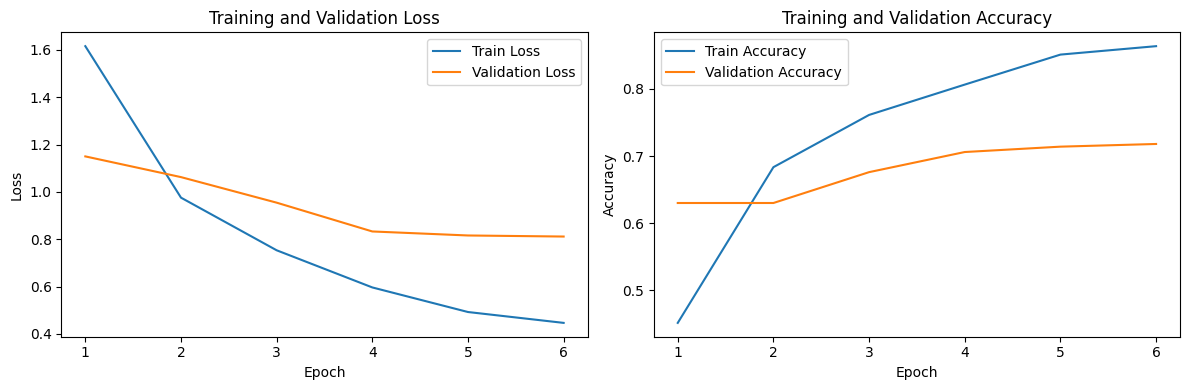

In [46]:



train_loss = history11.history['loss']
val_loss = history11.history['val_loss']
train_acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']

for epoch in range(epochs):
    print(f'Epoch {epoch + 1} - Train Loss: {train_loss[epoch]}, Validation Loss: {val_loss[epoch]}')
    print(f'Epoch {epoch + 1} - Train Accuracy: {train_acc[epoch]}, Validation Accuracy: {val_acc[epoch]}')


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Train Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
model2.save("mobilenet.h5")